In [1]:
import torch
import transformers

/beegfs/zhukova/.conda/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
def get_batch_size(
    model,
    device: torch.device,
    input_shape,
    output_shape,
    dataset_size: int,
    max_batch_size: int = None,
    num_iterations: int = 5,
) -> int:
    model.to(device)
    model.train(True)
    optimizer = torch.optim.Adam(model.parameters())

    batch_size = 2
    while True:
        if max_batch_size is not None and batch_size >= max_batch_size:
            batch_size = max_batch_size
            break
        if batch_size >= dataset_size:
            batch_size = batch_size // 2
            print(1)
            break
        try:
            for _ in range(num_iterations):
                # dummy inputs and targets
                inputs = torch.rand(*(batch_size, *input_shape), device=device)
                targets = torch.rand(*(batch_size, *output_shape), device=device)
                outputs = model(inputs)
                loss = F.mse_loss(targets, outputs)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            batch_size *= 2
        except RuntimeError:
            batch_size //= 2
            print("Error")
            break
    del model, optimizer
    torch.cuda.empty_cache()
    return batch_size

In [16]:
model = transformers.ConvBertForSequenceClassification.from_pretrained('YituTech/conv-bert-base', num_labels=2)
device = torch.device("cuda:1")
get_batch_size(model, device, (20,), (2,), 200000)

Some weights of ConvBertForSequenceClassification were not initialized from the model checkpoint at YituTech/conv-bert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Error


1

In [27]:
import MBDataLoader
import pandas as pd

In [34]:
df = pd.read_pickle("/beegfs/zhukova/mbg_jupyter/input/balanced-datasets/6-balanced_data.pkl")

In [35]:
loader = MBDataLoader.MBDataLoader(6)

There are 0 texts longer than 512. That's 0.0%.
There are 1 texts longer than 256. That's 9.323140033563304e-05%.
The 99% percentile is at nan


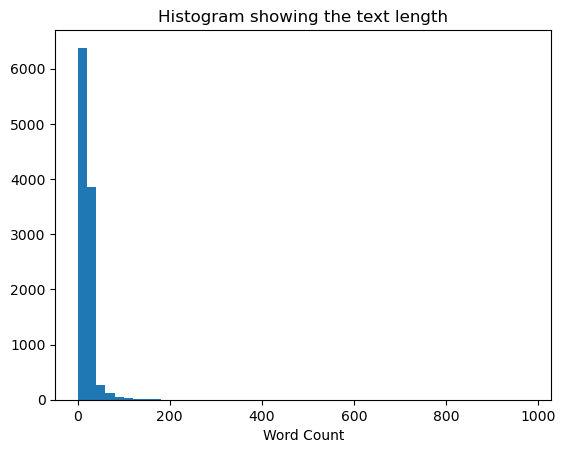

In [36]:
counts = loader.text_length_analysis(df)

In [37]:
import numpy as np
np.nanpercentile(counts, 99)

76.0

In [16]:
data = []
for index, row in df.iterrows():
    data.append({'text': str(row['text']), 'label': row['label'], 'dataset_id': row['dataset_id']})

In [17]:
data

[{'text': ' disney world worker dies after industrial accident at epcot 3147379002   This was in March and I m too lazy to do the rest of the research so here s a Wikipedia link   of incidents at Walt Disney World ',
  'label': 0,
  'dataset_id': '076'},
 {'text': 'There was a vocal minority that got very angry with it But yes most people just got a bit upset over it and made a joke out of it ',
  'label': 0,
  'dataset_id': '076'},
 {'text': 'She carries a little bottle of hot sauce ',
  'label': 0,
  'dataset_id': '076'},
 {'text': 'A day after Ukraine gave the go ahead to sign agreements with the EU at a November summit in Lithuania Putin made clear Moscow would hit back if its market were flooded by competitive goods from the EU because of Kiev removing import duties ',
  'label': 0,
  'dataset_id': '019'},
 {'text': ' Couldn t that same thing be said of someone like John Lasseter  There s a difference between someone who s taken a bad stance on rape vs someone who s actually been 